## Utils

### Import

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

### Graph Plot Function

In [2]:
def plot_graph(graph, title="Graph"):
    pos = nx.spring_layout(graph)
    _, ax = plt.subplots(figsize=(8, 6))
    nx.draw_networkx_edges(graph, pos, ax=ax, edge_color='black')
    nx.draw_networkx_nodes(graph, pos, ax=ax, node_size=250, node_color='skyblue', edgecolors='black', linewidths=0.5)
    plt.title(title)
    plt.show()

## Erdos Renyi

### Erods Renyi Generator

In [3]:
def generate_erdos_renyi_graph(n, p):
    """
    Generate a graph using the Erdos-Rényi model.

    Parameters:
    - n (int): Number of vertices in the graph.
    - p (float): Probability of an edge between any pair of vertices.

    Returns:
    - G (networkx.Graph): Graph representing the generated Erdos-Rényi graph.
    """
    edges = [(i, j) for i in range(n) for j in range(i + 1, n) if np.random.rand() < p]

    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(edges)

    return G

### Examples

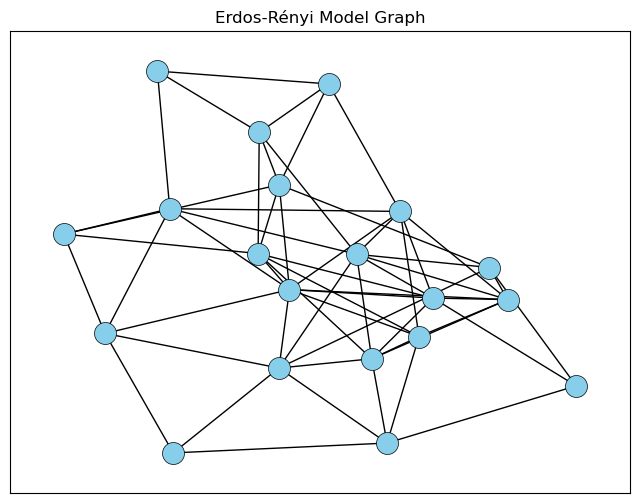

In [24]:
n_nodes = 20
p_erdos_renyi = 0.3
erdos_renyi_graph = generate_erdos_renyi_graph(n_nodes, p_erdos_renyi)
plot_graph(erdos_renyi_graph, title="Erdos-Rényi Model Graph")

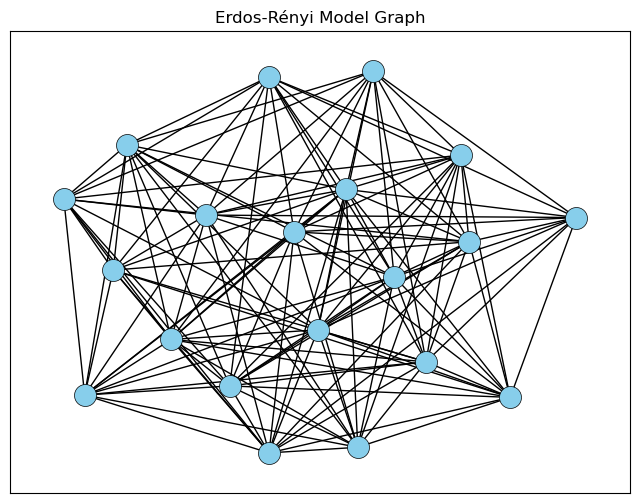

In [23]:
n_nodes = 20
p_erdos_renyi = 0.7
erdos_renyi_graph = generate_erdos_renyi_graph(n_nodes, p_erdos_renyi)
plot_graph(erdos_renyi_graph, title="Erdos-Rényi Model Graph")

## Mixture Model for Degrees

### Mixture Models for Degrees Generator

In [4]:
def generate_mixture_model_for_degrees(n, Q, alpha, poisson_lambda):
    """
    Generate a graph using the mixture model for degrees.

    Parameters:
    - n (int): Number of vertices in the graph.
    - Q (int): Number of clusters.
    - alpha (list): List of prior probabilities for each cluster.
    - poisson_lambda (list): List of Poisson distribution parameters for each cluster.

    Returns:
    - G (networkx.Graph): Graph representing the generated mixture model graph.
    """

    cluster_assignments = np.random.choice(Q, n, p=alpha)

    edges = []
    for i in range(n):
        for j in range(i + 1, n):
            if cluster_assignments[i] != cluster_assignments[j]:
                prob_edge = np.random.poisson(poisson_lambda[cluster_assignments[i]]) * np.random.poisson(poisson_lambda[cluster_assignments[j]])
                prob_edge /= np.max([1, prob_edge])

                if np.random.rand() < prob_edge:
                    edges.append((i, j))

    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(edges)

    return G

### Examples

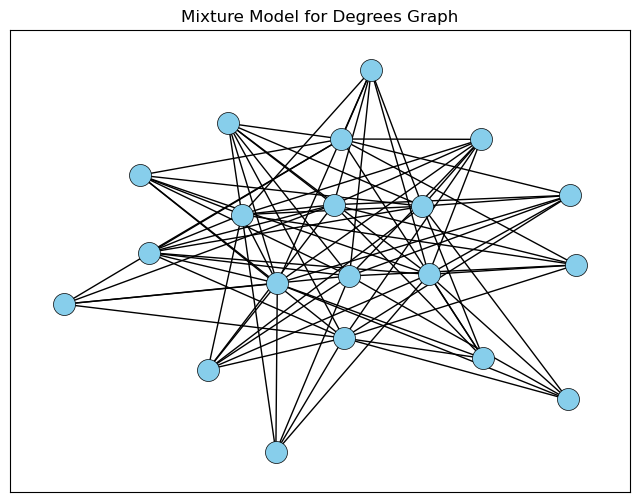

In [27]:
n = 20
Q = 3
alpha = [0.5, 0.4, 0.1]
poisson_lambda = [2, 3, 1]
mixture_model_graph = generate_mixture_model_for_degrees(n, Q, alpha, poisson_lambda)
plot_graph(mixture_model_graph, title="Mixture Model for Degrees Graph")

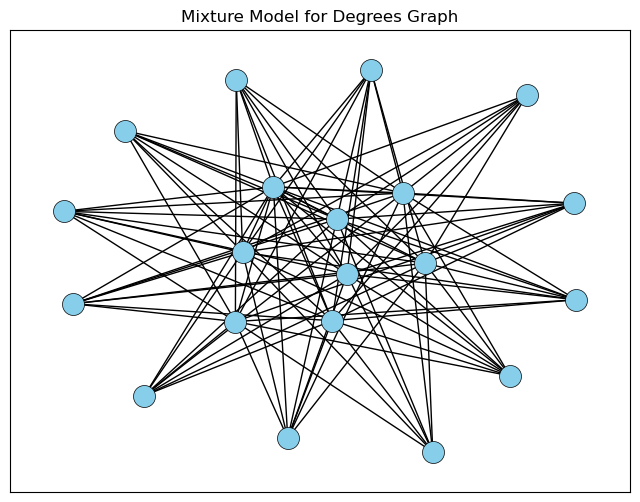

In [29]:
n = 20
Q = 3
alpha = [0.5, 0.4, 0.1]
poisson_lambda = [4, 6, 2]
mixture_model_graph = generate_mixture_model_for_degrees(n, Q, alpha, poisson_lambda)
plot_graph(mixture_model_graph, title="Mixture Model for Degrees Graph")

## Erods Renyi Mixture for Graphs

### ERMG Generator

In [5]:
def generate_ermg(n, Q, alpha, pi):
    """
    Generate an Erdos-Rényi Mixture for Graphs (ERMG) model.

    Parameters:
    - n: Number of vertices
    - Q: Number of clusters
    - alpha: Prior probabilities for clusters
    - pi: Symmetric probabilities for inter-cluster connections

    Returns:
    - graph: NetworkX graph representing the ERMG model
    """

    vertex_clusters = np.random.choice(np.arange(1, Q + 1), size=n, p=alpha)

    G = nx.Graph()

    for i in range(n):
        G.add_node(i, cluster=vertex_clusters[i])

    for i in range(n):
        for j in range(i + 1, n):
            if vertex_clusters[i] != vertex_clusters[j]:
                edge_prob = np.random.rand()
                if edge_prob < pi[vertex_clusters[i] - 1, vertex_clusters[j] - 1]:
                    G.add_edge(i, j)
                    G.add_edge(j, i)

    return G

### Examples

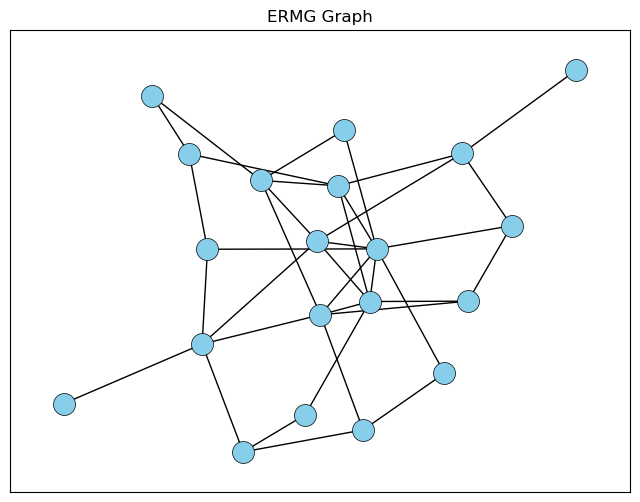

In [31]:
n = 20
Q = 3
alpha = [0.5, 0.3, 0.2]
pi = np.array([[0.8, 0.3, 0.5], 
               [0.3, 0.7, 0.2],
               [0.5, 0.2, 0.9]])

ermg_graph = generate_ermg(n, Q, alpha, pi)
plot_graph(ermg_graph, title="ERMG Graph")

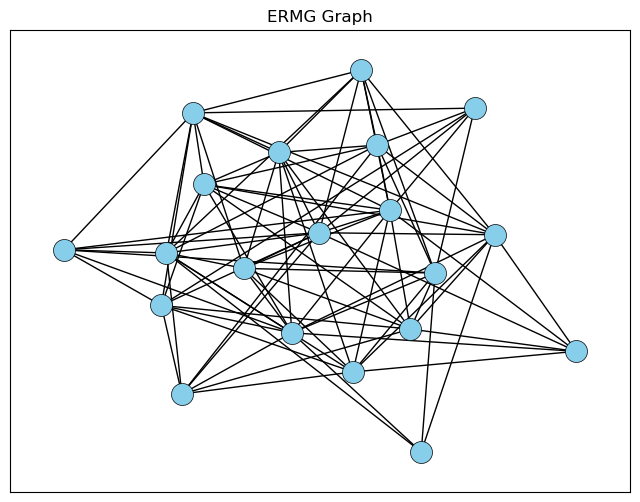

In [32]:
n = 20
Q = 3
alpha = [0.5, 0.3, 0.2]
pi = np.array([[0.8, 0.7, 0.9], 
               [0.7, 0.7, 0.6],
               [0.9, 0.6, 0.9]])

ermg_graph = generate_ermg(n, Q, alpha, pi)
plot_graph(ermg_graph, title="ERMG Graph")

## Graphs Comparaison

### Properties Function

In [6]:
def analyze_graph_properties(graph):
    """
    Analyze various properties of a given graph.

    Parameters:
    - graph: NetworkX graph object

    Returns:
    - degree_distribution: Dictionary containing the degree distribution
    - clustering_coefficient: Average clustering coefficient of the graph
    - average_path_length: Average shortest path length in the graph
    - longest_path: Longest path in the graph
    - shortest_path: Shortest path in the graph
    """
    average_degree = np.mean(list(dict(graph.degree())))

    average_path_length = nx.average_shortest_path_length(graph)

    graph_density = nx.density(graph)

    graph_diameter = nx.diameter(graph)

    global_efficiency = nx.global_efficiency(graph)

    clustering_coefficient = nx.average_clustering(graph)

    betweenness_centralities = nx.betweenness_centrality(graph)

    return {
        "average_degree": average_degree,
        "average_path_length": average_path_length,
        "graph_density": graph_density,
        "graph_diameter": graph_diameter,
        "global_efficiency": global_efficiency,
        "clustering_coefficient": clustering_coefficient,
        "betweenness_centralities": betweenness_centralities
    }

### Generation of 200 Graphs with Erdos-Renyi Model

In [7]:
n = 200
p = 0.3
erdos_renyi_graphs = [generate_erdos_renyi_graph(n, p) for _ in range(100)]
erdos_renyi_graph_properties = [analyze_graph_properties(graph) for graph in erdos_renyi_graphs]

### Generation of 200 Graphs with Mixture Model for Degrees

In [8]:
n = 200
Q = 3
alpha = [0.5, 0.3, 0.2]
poisson_lambda = [2, 3, 1]
mixture_model_graphs = [generate_mixture_model_for_degrees(n, Q, alpha, poisson_lambda) for _ in range(100)]
mixture_model_graph_properties = [analyze_graph_properties(graph) for graph in mixture_model_graphs]

### Generation of 200 Graphs with Erdos-Renyi Mixture for Graphs

In [9]:
n = 200
Q = 3
alpha = [0.5, 0.3, 0.2]
pi = np.array([[0.8, 0.3, 0.5], 
               [0.3, 0.7, 0.2],
               [0.5, 0.2, 0.9]])
ermg_graphs = [generate_ermg(n, Q, alpha, pi) for _ in range(100)]
ermg_graph_properties = [analyze_graph_properties(graph) for graph in ermg_graphs]

### Average Degree

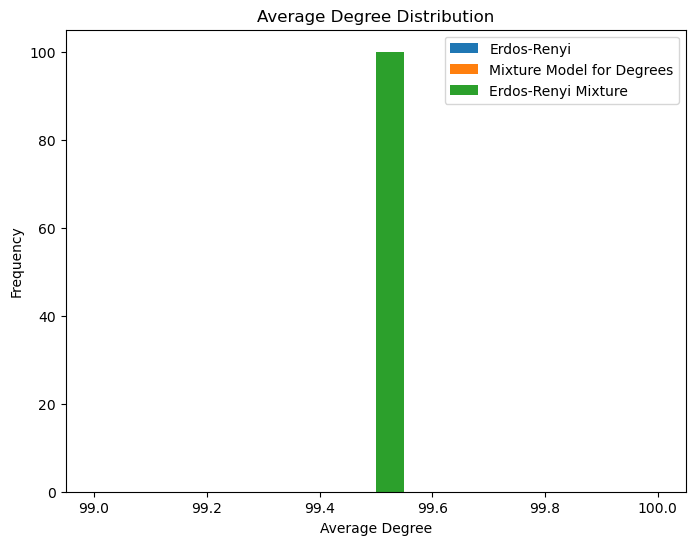

In [10]:
plt.figure(figsize=(8, 6))
plt.hist([props['average_degree'] for props in erdos_renyi_graph_properties], bins=20, label="Erdos-Renyi")
plt.hist([props['average_degree'] for props in mixture_model_graph_properties], bins=20, label="Mixture Model for Degrees")
plt.hist([props['average_degree'] for props in ermg_graph_properties], bins=20, label="Erdos-Renyi Mixture")
plt.legend()
plt.xlabel("Average Degree")
plt.ylabel("Frequency")
plt.title("Average Degree Distribution")
plt.show()

### Average Path Length

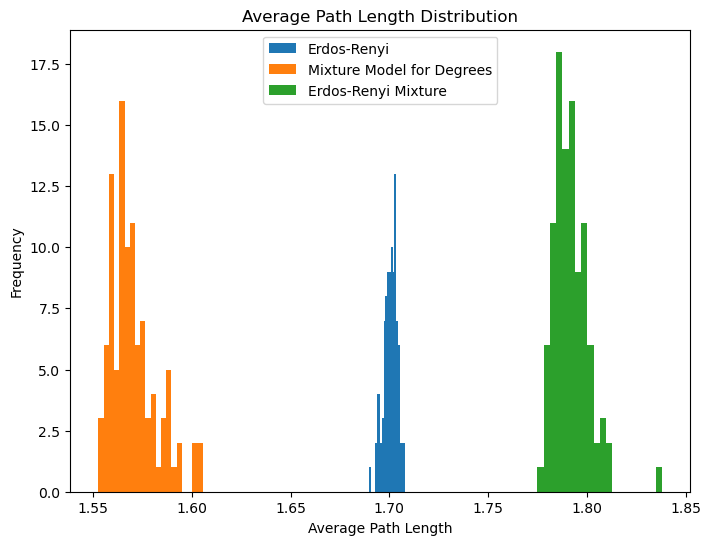

In [11]:
plt.figure(figsize=(8, 6))
plt.hist([props['average_path_length'] for props in erdos_renyi_graph_properties], bins=20, label="Erdos-Renyi")
plt.hist([props['average_path_length'] for props in mixture_model_graph_properties], bins=20, label="Mixture Model for Degrees")
plt.hist([props['average_path_length'] for props in ermg_graph_properties], bins=20, label="Erdos-Renyi Mixture")
plt.legend()
plt.xlabel("Average Path Length")
plt.ylabel("Frequency")
plt.title("Average Path Length Distribution")
plt.show()

### Graph Density

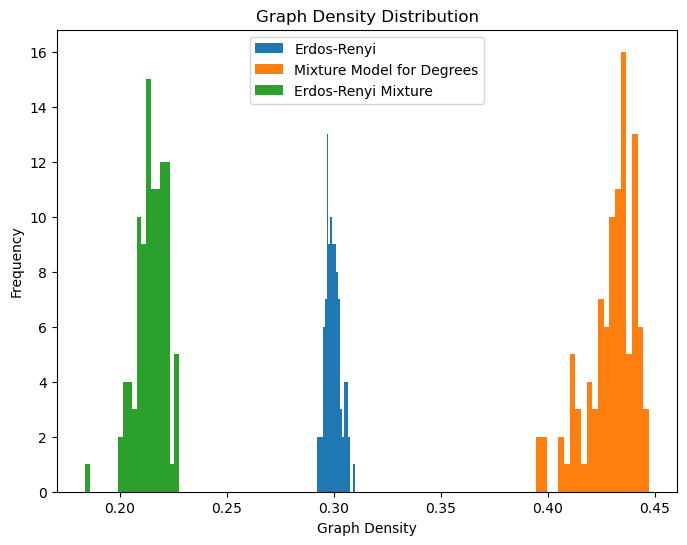

In [12]:
plt.figure(figsize=(8, 6))
plt.hist([props['graph_density'] for props in erdos_renyi_graph_properties], bins=20, label="Erdos-Renyi")
plt.hist([props['graph_density'] for props in mixture_model_graph_properties], bins=20, label="Mixture Model for Degrees")
plt.hist([props['graph_density'] for props in ermg_graph_properties], bins=20, label="Erdos-Renyi Mixture")
plt.legend()
plt.xlabel("Graph Density")
plt.ylabel("Frequency")
plt.title("Graph Density Distribution")
plt.show()

### Global Efficiency

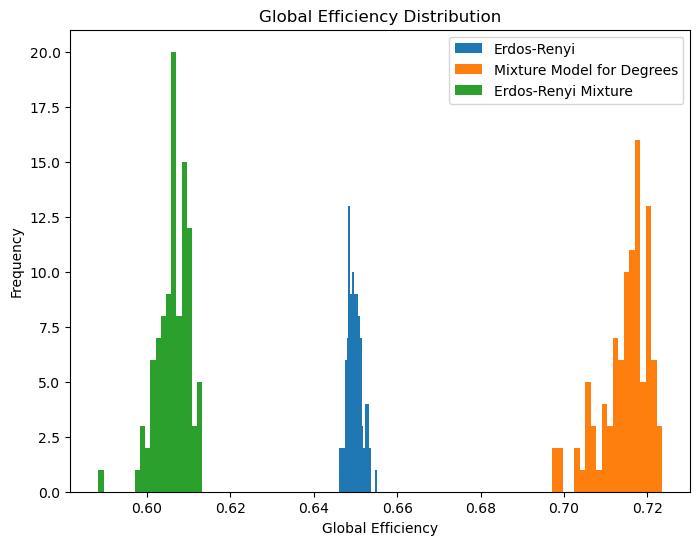

In [13]:
plt.figure(figsize=(8, 6))
plt.hist([props['global_efficiency'] for props in erdos_renyi_graph_properties], bins=20, label="Erdos-Renyi")
plt.hist([props['global_efficiency'] for props in mixture_model_graph_properties], bins=20, label="Mixture Model for Degrees")
plt.hist([props['global_efficiency'] for props in ermg_graph_properties], bins=20, label="Erdos-Renyi Mixture")
plt.legend()
plt.xlabel("Global Efficiency")
plt.ylabel("Frequency")
plt.title("Global Efficiency Distribution")
plt.show()

### Clustering Coefficient

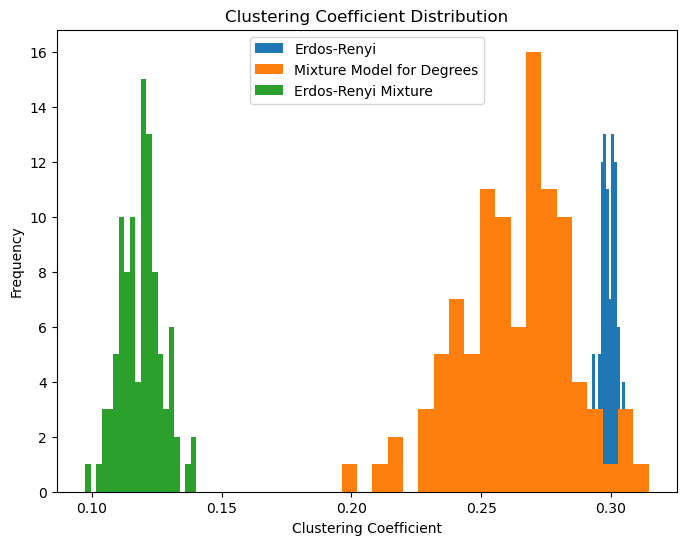

In [14]:
plt.figure(figsize=(8, 6))
plt.hist([props['clustering_coefficient'] for props in erdos_renyi_graph_properties], bins=20, label="Erdos-Renyi")
plt.hist([props['clustering_coefficient'] for props in mixture_model_graph_properties], bins=20, label="Mixture Model for Degrees")
plt.hist([props['clustering_coefficient'] for props in ermg_graph_properties], bins=20, label="Erdos-Renyi Mixture")
plt.legend()
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.title("Clustering Coefficient Distribution")
plt.show()

### Betweeness Centrality

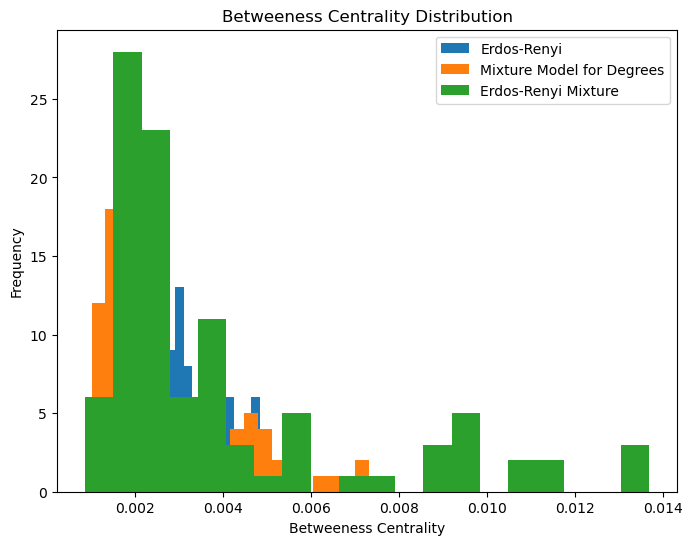

In [15]:
plt.figure(figsize=(8, 6))
plt.hist([props['betweenness_centralities'][0] for props in erdos_renyi_graph_properties], bins=20, label="Erdos-Renyi")
plt.hist([props['betweenness_centralities'][0] for props in mixture_model_graph_properties], bins=20, label="Mixture Model for Degrees")
plt.hist([props['betweenness_centralities'][0] for props in ermg_graph_properties], bins=20, label="Erdos-Renyi Mixture")
plt.legend()
plt.xlabel("Betweeness Centrality")
plt.ylabel("Frequency")
plt.title("Betweeness Centrality Distribution")
plt.show()

# EM algorithm for ERMG

In [16]:
def b(x, pi):
    return (pi**x) * ((1-pi)**(1-x))

def EM_init(X, num_clusters):
    N = X.shape[0]
    T = np.random.uniform(0,1,(N, num_clusters))
    for i in range(N):
        T[i,:] = T[i,:] / np.sum(T[i,:])

    alpha = np.random.uniform(0,1,num_clusters)
    alpha = alpha / np.sum(alpha)

    pi = np.zeros((num_clusters, num_clusters))
    for q in range(num_clusters):
        for l in range(q, num_clusters):
            pi[q,l] = np.random.uniform(0,1)
            pi[l,q] = pi[q,l]
    return T, alpha, pi


def E(X, T, alpha, pi):
    """The "E" step of the EM algorithm : computes the T_ij
       For computational purposes, we omit the multiplicative factor"""

    N, num_clusters = T.shape
    T_new = np.copy(T)
    for i in range(N):
        for q in range(num_clusters):
            prod_global = 1.0
            for j in range(N):
                if i != j:
                    prod_local = 1.0
                    for l in range(num_clusters):
                        prod_local *= np.power(b(X[i,j], pi[q,l]), T[j,l])
                    prod_global *= prod_local
            T_new[i,q] = alpha[q] * prod_global
        T_new[i,:] = T_new[i,:] / np.sum(T_new[i,:])
    return T_new


def M(X, T):
    
    """The "M" step of the EM algorithm : computes the updated
       alpha, mu, sigma values"""
    
    N = X.shape[0]
    num_clusters = T.shape[1]
    # Update alpha
    alpha_new = np.mean(T, axis=0)
    alpha_new = alpha_new / np.sum(alpha_new)

    # Update pi
    pi_new = np.zeros((num_clusters, num_clusters))
    for q in range(num_clusters):
        for l in range(q, num_clusters):
            num = 0.0
            den = 0.0
            for i in range(N):
                for j in range(N):
                    if i != j:
                        num += X[i,j] * T[i,q] * T[j,l]
                        den += T[i,q] * T[j,l]
            pi_new[q,l] = num / den
            pi_new[l,q] = pi_new[q,l]
    return alpha_new, pi_new


def EM_Erdos_Renyi(X, num_clusters, num_iterations = 10):
    """Performs the EM algorithm for num_clusters classes"""
    T, alpha, pi = EM_init(X, num_clusters)
    
    for _ in range(num_iterations):
        # Etape "E" : calcul des T_ij
        T = E(X, T, alpha, pi)
        # Etape "M" : calcul des paramètres en fonction de T
        alpha, pi = M(X, T)
        
    return alpha, pi

In [17]:
def generate_graph_for_EM(n, Q):
    alpha_true = np.random.uniform(0,1,Q)
    alpha_true = alpha_true / np.sum(alpha_true)
    pi_true = np.zeros((Q,Q))
    for q in range(Q):
        for l in range(q, Q):
            pi_true[q,l] = np.random.uniform(0,1)
            pi_true[l,q] = pi_true[q,l]

    graph_ermg = generate_ermg(n, Q, alpha_true, pi_true)
    adjacency_matrix = nx.adjacency_matrix(graph_ermg).toarray()
    return adjacency_matrix, alpha_true, pi_true, graph_ermg

def generate_EM(Q, adjacency_matrix):
    alpha_EM, pi_EM = EM_Erdos_Renyi(adjacency_matrix, Q, num_iterations=10)
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

    axs[0].hist(alpha_EM, bins=50)
    axs[0].set_xlabel("Alpha")
    axs[0].set_ylabel("Frequency")
    axs[0].set_title("Histogram for Estimated Alpha")

    im = axs[1].imshow(pi_EM, cmap='viridis', vmin=0, vmax=np.max(pi_EM), aspect='auto')
    axs[1].set_xlabel("Cluster")
    axs[1].set_ylabel("Cluster")
    axs[1].set_title("Matrix for Estimated Pi")
    fig.colorbar(im, ax=axs[1])

    plt.tight_layout()
    return alpha_EM, pi_EM, fig

In [18]:
def plot_error(alpha_true, alpha_EM, pi_true, pi_EM):   
    def calculate_error(true_params, estimated_params):
        return np.abs(true_params - estimated_params)

    error_alpha = calculate_error(alpha_true, alpha_EM)
    error_pi = calculate_error(pi_true, pi_EM)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

    axs[0].hist(error_alpha, bins=50)
    axs[0].set_xlabel("Error on Alpha")
    axs[0].set_ylabel("Frequency")
    axs[0].set_title("Error Histogram for Alpha")

    im = axs[1].imshow(error_pi, cmap='viridis', vmin=0, vmax=np.max(error_pi), aspect='auto')
    axs[1].set_xlabel("Cluster")
    axs[1].set_ylabel("Cluster")
    axs[1].set_title("Error Matrix for Pi")
    fig.colorbar(im, ax=axs[1])

    plt.tight_layout()
    plt.show()

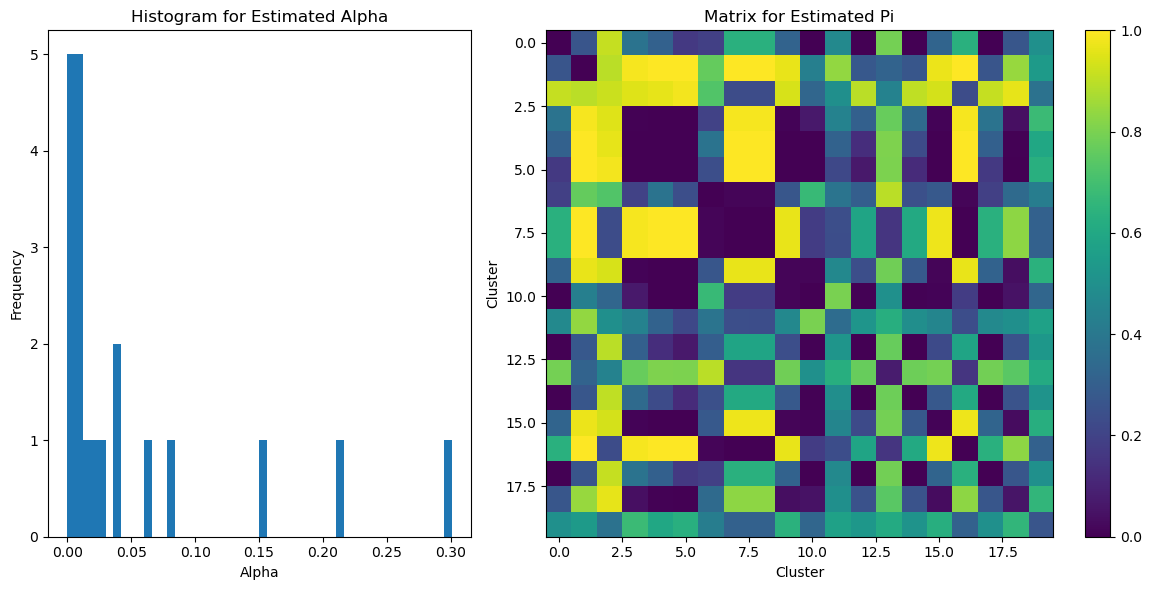

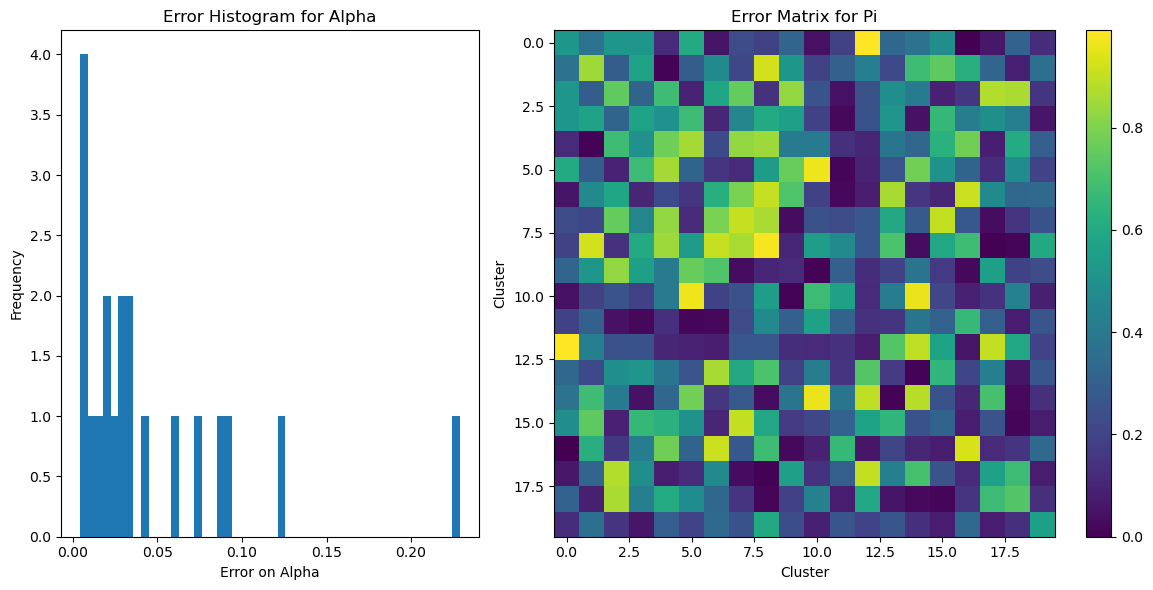

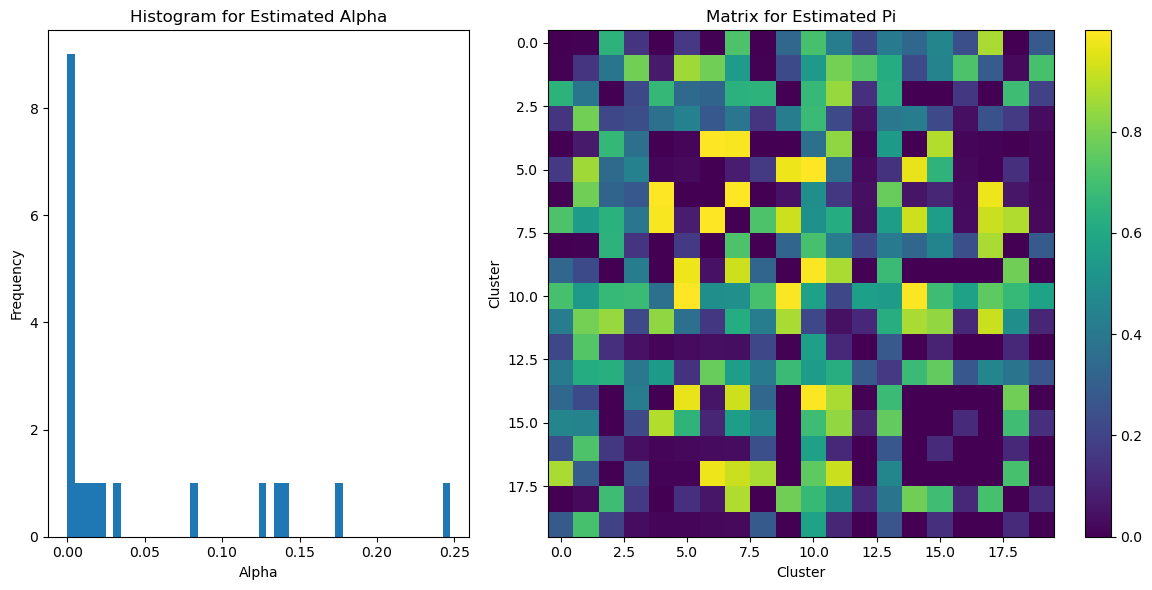

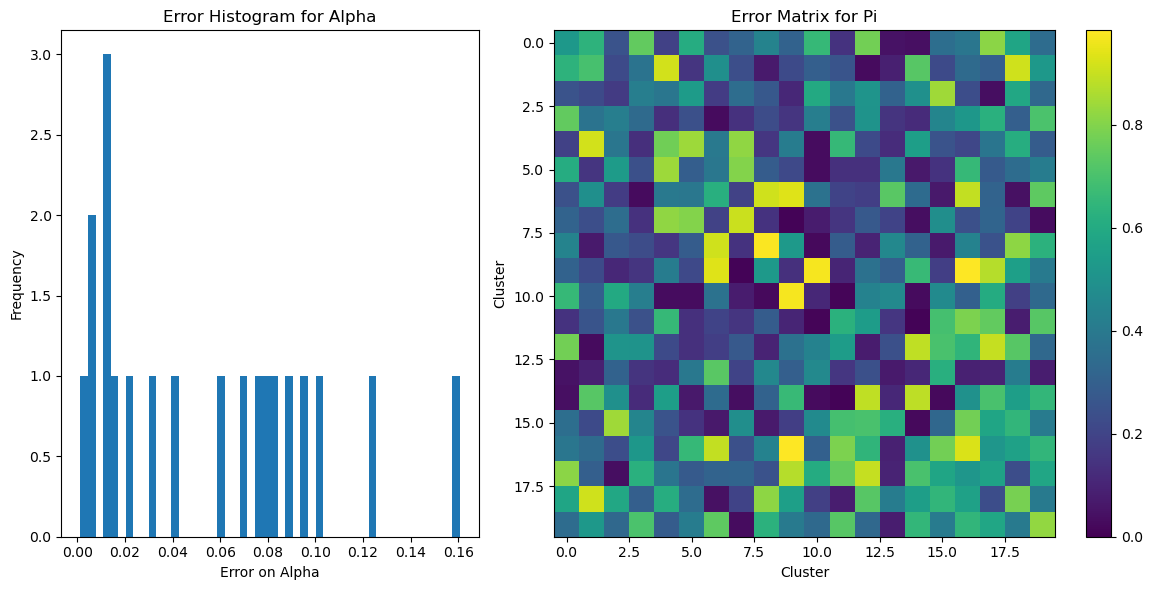

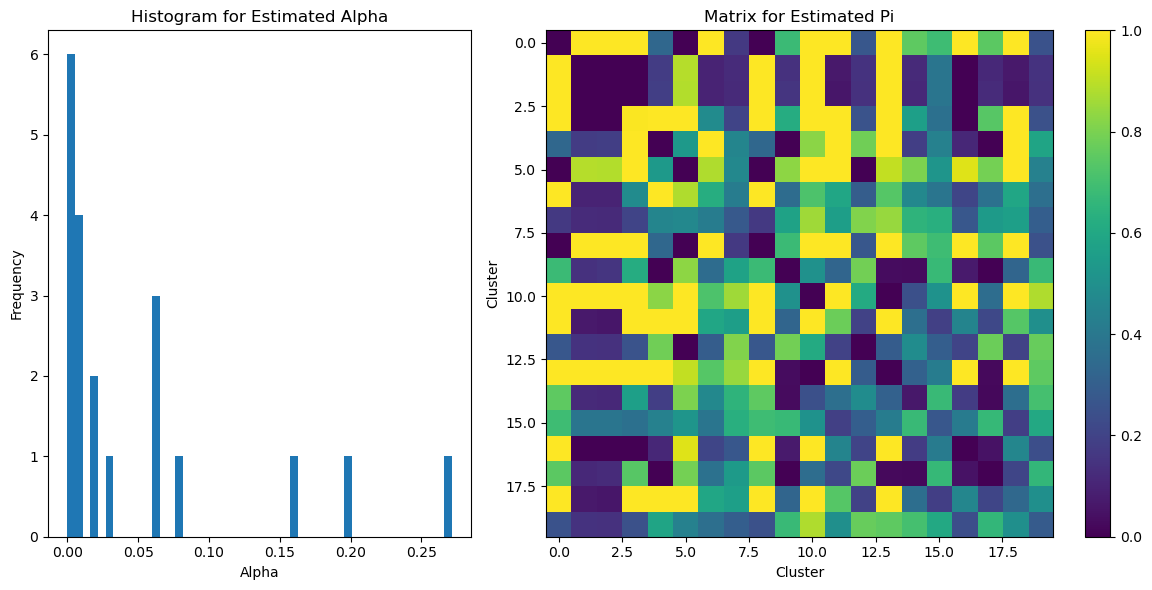

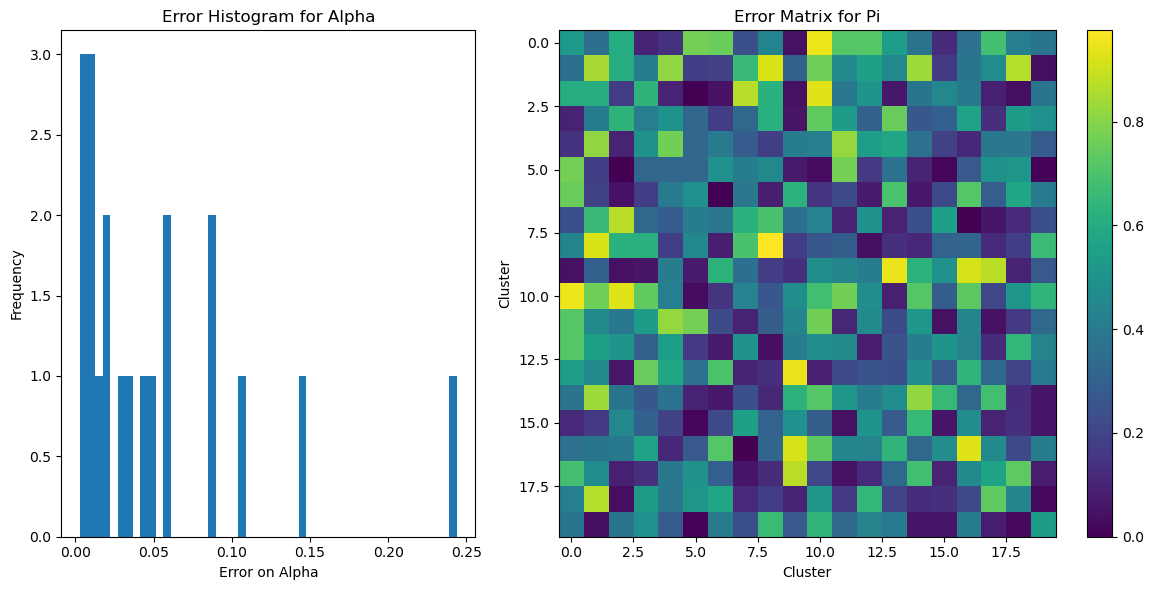

In [19]:
adjacency_matrix, alpha_true, pi_true, graph_ermg = generate_graph_for_EM(100, 20)
for _ in range(3):
    alpha_EM, pi_EM, figure = generate_EM(20, adjacency_matrix)
    plt.show()
    plot_error(alpha_true, alpha_EM, pi_true, pi_EM)

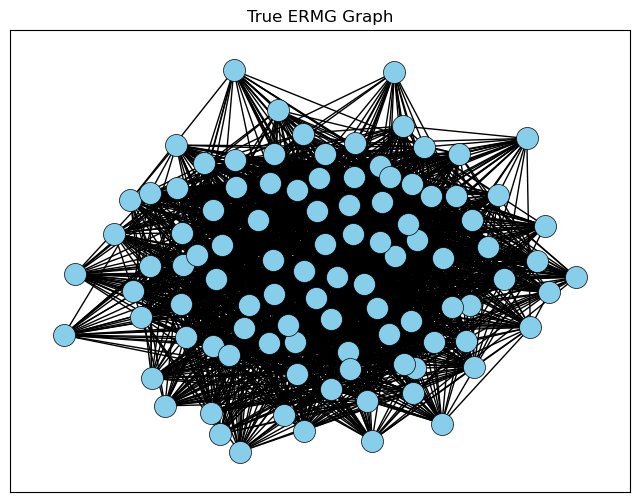

In [20]:
plot_graph(graph_ermg, title="True ERMG Graph")